In [1]:
from numpy import log, sqrt, exp
from scipy.stats import norm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
# vanilla option
def option(S, K, T, v, r, q):
    
    call = {}
    put = {}

    sqrtT = sqrt(T)
    ert = exp(-r*T)
    eqt = exp(-q*T)

    d1 = (log(S/K) + (r-q+0.5*v**2)*T) / (v*sqrtT)
    d2 = d1 - v*sqrtT
    nd1 = norm.cdf(d1)
    nd2 = norm.cdf(d2)
    neg_nd1 = norm.cdf(-d1)
    neg_nd2 = norm.cdf(-d2)
    der_nd1 = norm.pdf(d1)

    call['price'] = S*nd1*eqt - K*nd2*ert
    put['price'] = - S*neg_nd1*eqt + K*neg_nd2*ert

    call['delta'] = eqt*nd1
    put['delta'] = eqt*(nd1-1)
    
    return call, put

In [3]:
S = np.array([80, 90, 100, 110, 120])
K = 100
T = 0.25
v = 0.20
r = 0
q = 0

In [4]:
call = {}
call_delta = {}
put = {}
put_delta = {}

for v in [0.1, 0.2, 0.5, 1, 2, 5, 10, 1000, 100000000]:
    data = option(S, K, T, v, r, q)
    
    call[v] = data[0]['price']
    call_delta[v] = data[0]['delta']
    put[v] = data[1]['price']
    put_delta[v] = data[1]['delta']


## Result

In [5]:
call = pd.DataFrame(call)
call.index = S
call

,0.1,0.2,0.5,1.0,2.0,5.0,10.0,1000.0,100000000.0
80,0.000004,0.039914,2.265590,9.462966,25.244802,61.145792,78.890073,80.0,80.0
90,0.030069,0.712381,5.272058,14.160003,31.563122,69.965016,88.822010,90.0,90.0
100,1.994504,3.987761,9.947645,19.741265,38.292492,78.870045,98.758067,100.0,100.0
110,10.057028,10.953947,16.190426,26.095681,45.374735,87.848353,108.697641,110.0,110.0
120,20.000177,20.147332,23.705883,33.108974,52.761418,96.890102,118.640260,120.0,120.0


In [6]:
call_delta = pd.DataFrame(call_delta)
call_delta.index = S
call_delta

,0.1,0.2,0.5,1.0,2.0,5.0,10.0,1000.0,100000000.0
80,0.000005,0.014576,0.221370,0.422193,0.609055,0.877127,0.992963,1.0,1.0
90,0.018662,0.157784,0.383446,0.515666,0.653446,0.886449,0.993411,1.0,1.0
100,0.509973,0.519939,0.549738,0.598706,0.691462,0.894350,0.993790,1.0,1.0
110,0.973271,0.842094,0.693656,0.670256,0.724182,0.901149,0.994117,1.0,1.0
120,0.999879,0.969481,0.803527,0.730605,0.752482,0.907070,0.994401,1.0,1.0


In [7]:
put = pd.DataFrame(put)
put.index = S
put

,0.1,0.2,0.5,1.0,2.0,5.0,10.0,1000.0,100000000.0
80,20.000004,20.039914,22.265590,29.462966,45.244802,81.145792,98.890073,100.0,100.0
90,10.030069,10.712381,15.272058,24.160003,41.563122,79.965016,98.822010,100.0,100.0
100,1.994504,3.987761,9.947645,19.741265,38.292492,78.870045,98.758067,100.0,100.0
110,0.057028,0.953947,6.190426,16.095681,35.374735,77.848353,98.697641,100.0,100.0
120,0.000177,0.147332,3.705883,13.108974,32.761418,76.890102,98.640260,100.0,100.0


In [8]:
put_delta = pd.DataFrame(put_delta)
put_delta.index = S
put_delta

,0.1,0.2,0.5,1.0,2.0,5.0,10.0,1000.0,100000000.0
80,-0.999995,-0.985424,-0.778630,-0.577807,-0.390945,-0.122873,-0.007037,0.0,0.0
90,-0.981338,-0.842216,-0.616554,-0.484334,-0.346554,-0.113551,-0.006589,0.0,0.0
100,-0.490027,-0.480061,-0.450262,-0.401294,-0.308538,-0.105650,-0.006210,0.0,0.0
110,-0.026729,-0.157906,-0.306344,-0.329744,-0.275818,-0.098851,-0.005883,0.0,0.0
120,-0.000121,-0.030519,-0.196473,-0.269395,-0.247518,-0.092930,-0.005599,0.0,0.0


## Plotting

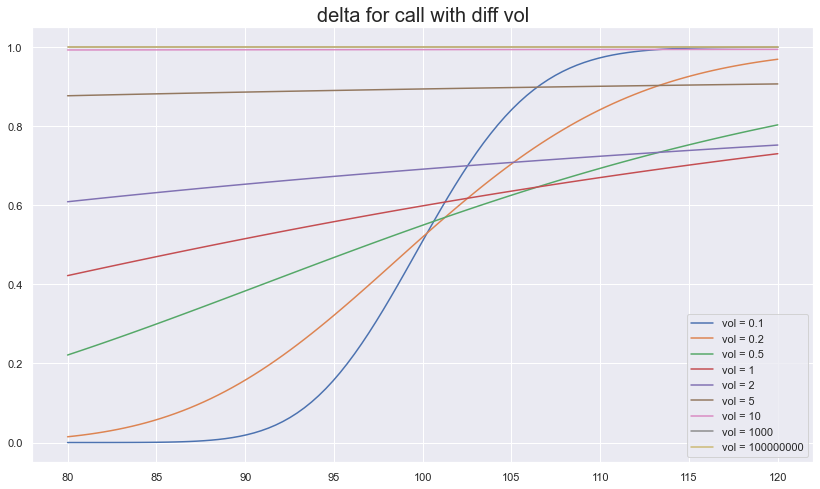

In [9]:
S = np.linspace(80, 120, 100)
plt.figure(figsize=(14,8))
for v in [0.1, 0.2, 0.5, 1, 2, 5, 10, 1000, 100000000]:
    data = option(S, K, T, v, r, q)[0]['delta']
    plt.plot(S,data, label=f"vol = {v}")
    plt.title("delta for call with diff vol", fontsize= 20)
plt.legend();